Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

/home/yuzhong/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [2]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

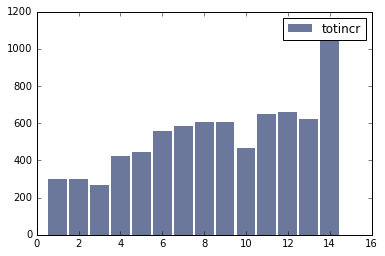

In [3]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

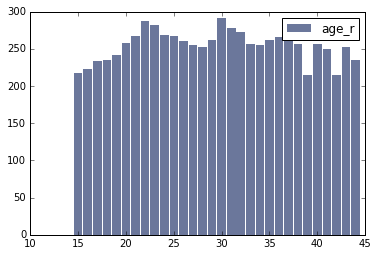

In [4]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

In [5]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show(xlabel='value', ylabel='frequency')

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

Average parity:  1.22321078111
Variance:  1.93132719281
Standard deviation:  1.389721984


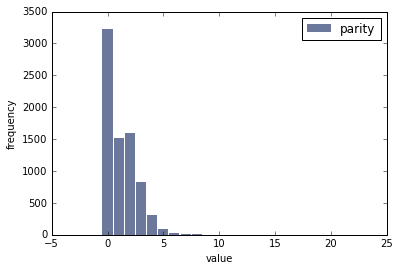

In [6]:
hist = thinkstats2.Hist(resp.parity)
print 'Average parity: ', resp.parity.mean()
print 'Variance: ', resp.parity.var()
print 'Standard deviation: ', resp.parity.std()


thinkplot.Hist(hist, label='parity')
thinkplot.Show(xlabel='value', ylabel='frequency')

### Distribution Interpretation
As the distribution of the respondents' parity shows, 0 is more common than other values with an average value of about 1.2. The distribution has a tail that extends to the right while most respondents falls between 0 child and 5 child. The standard deviation is 1.39, which means we should expect deviation of 1 to 2 children to be common. Although we can barely see from the histograph, there is one case for 22 children and one for 16 children. In this case, we need some domain knowledge to understand the outliers.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [7]:
for value, freq in hist.Largest(1):
    print '\nthe largest values of parity is ', value


the largest values of parity is  22


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

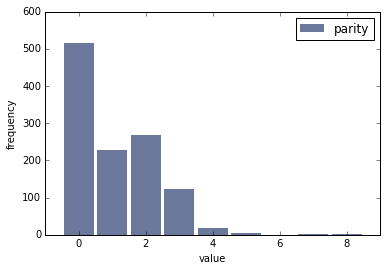

In [8]:
value = resp.totincr.max()
resp_high_income = resp[resp.totincr == value]
resp_other_income = resp[resp.totincr != value]

hist_high_income_parity = thinkstats2.Hist(resp_high_income.parity)
thinkplot.Hist(hist_high_income_parity, label='parity')
thinkplot.Show(xlabel='value', ylabel='frequency')

Find the largest parities for high income respondents.

In [9]:
for value, freq in hist_high_income_parity.Largest(1):
    print "the largest parities for high income respondent is ", value

the largest parities for high income respondent is  8


Compare the mean <tt>parity</tt> for high income respondents and others.

In [10]:
print 'average parity for high income respondents ', resp_high_income.parity.mean()
print 'average parity for other respondents ', resp_other_income.parity.mean()

average parity for high income respondents  1.07586206897
average parity for other respondents  1.24957581367


Investigate any other variables that look interesting.

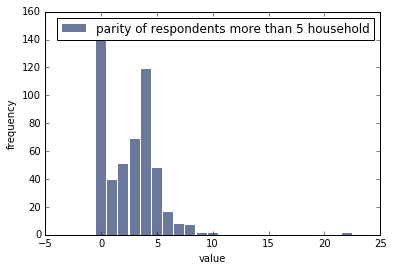

average parity for respondents with more than 5 houses 2.55945419103
average parity for respondents with less than 5 houses 1.1270687237


In [11]:
resp_household_5_more = resp[resp.numfmhh >= 5]
resp_household_5_less = resp[resp.numfmhh < 5]

hist_household_5_more = thinkstats2.Hist(resp_household_5_more.parity)
hist_household_5_less = thinkstats2.Hist(resp_household_5_less.parity)

thinkplot.Hist(hist_household_5_more, label='parity of respondents more than 5 household')
thinkplot.Show(xlabel='value', ylabel='frequency')

print "average parity for respondents with more than 5 houses", resp_household_5_more.parity.mean()
print "average parity for respondents with less than 5 houses", resp_household_5_less.parity.mean()

### Histogram Interpretion
The parity of respondents more than 5 household has two modes, with 0 to be the most common value and 4 children to be the second most common value. The rest of the graph seems to cluster around value 4 but it is hardly bell-shaped. The tail extends more to the right than to the left. There is an outlier of 22 in the graph. Again, we need domain knowledge in order to interprete that outlier. 

Compared to the distribution of the general parity, the average parity for respondents with more than 5 houses is 2.56 while the general average is 1.12. Respondents with more than 5 houses tend to have more children than the others on average.

### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [12]:
import nsfg
df = nsfg.ReadFemPreg()

In [13]:
firsts = df[df.birthord == 1]
others = df[df.birthord != 1]

firsts_weight_hist = thinkstats2.Hist(firsts.totalwgt_lb)
others_weight_hist = thinkstats2.Hist(others.totalwgt_lb)

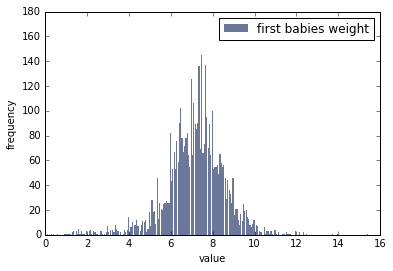

In [14]:
thinkplot.Hist(firsts_weight_hist, align='right', label='first babies weight')
thinkplot.Show(xlabel='value', axis=[0, 16, 0, 180], ylabel='frequency')

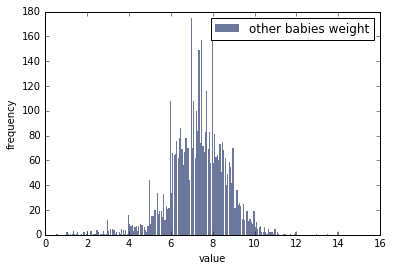

In [15]:
thinkplot.Hist(others_weight_hist, align='right',label='other babies weight')
thinkplot.Show(xlabel='value', axis=[0, 16, 0, 180], ylabel='frequency')

While the histograms don't tell us lot about the difference between these two groups. We need to look into the statistics information between the two groups.

In [16]:
import math
def CohenD(group1, group2):
    """CohenD calculate the value of Cohen's d of two comparable groups to evaluate the effective size"""
    diff = group1.mean() - group2.mean()
    
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    return diff / math.sqrt(pooled_var)

In [17]:
print 'Average weight of first babies ', firsts.totalwgt_lb.mean()
print 'Average weight of other babies ', others.totalwgt_lb.mean()
print 'Difference in weights between first and other babies ', firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()

print 'Cohen\'s d is ', CohenD(firsts.totalwgt_lb, others.totalwgt_lb)

Average weight of first babies  7.20109443044
Average weight of other babies  7.32585561497
Difference in weights between first and other babies  -0.124761184535
Cohen's d is  -0.0889364117772


### Interpretation
Cohen's D of -0.089 is statistically small and therefore there is not a significant difference between first babies and other babies. Compared to the Cohen's D's value for pregnancy length (as given in the book, is 0.029) of the two groups, it is a little bit larger, but still not large enough to be considered as a significant difference.